## Initialize important libraries and sidefunction

In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
from ema_workbench.analysis import parcoords
from ema_workbench.analysis import pairs_plotting
from ema_workbench.analysis import feature_scoring
import seaborn as sns
from sideFunctions import combineResults, pairsPlotEMA, plotHeatmap, parallelPlot, minimizeDF, getDf, getScenarios

dirname = os.path.dirname(os.path.abspath('__file__'))
resultFolder = os.path.join(dirname, 'Results')
figureFolder = os.path.join(resultFolder, 'Figures')

/home/martijn/Documents/Work/CoronaPersonalStealing/NoveltySearchEMA/venv/lib/python3.8/site-packages/ema_workbench/analysis/prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(("altair based interactive "


## read files into dataframes

In [2]:
nsDf = getDf(0, True)
# print(nsDf.head())

In [3]:
lhcDf = getDf(0, False)
# print(lhcDf.head())

## check for duplicates

In [4]:
# lhcDfCompare = lhcDf[['b', 'q', 'mean', 'stdev', 'delta', 'max_P', 'utility', 'inertia', 'reliability']]
# nsDfCompare = nsDf[['b', 'q', 'mean', 'stdev', 'delta', 'max_P', 'utility', 'inertia', 'reliability']]

lhcDfCompare = lhcDf[['max_P', 'utility', 'inertia', 'reliability']]
# lhcDfCompare = nsDfMax[['max_P', 'utility', 'inertia', 'reliability']]
nsDfCompare = nsDf[['max_P', 'utility', 'inertia', 'reliability']]

df_diff = pd.concat([nsDfCompare,lhcDfCompare]).drop_duplicates(keep=False)
# df_diff_2 = pd.concat([df_diff,lhcDfCompare]).drop_duplicates(keep=False)
print(len(df_diff))
print(len(lhcDfCompare))
print(len(nsDfCompare))

1000014
1000000
14


## Generate limits to be used in the parallel plots

In [4]:

lhcDfMin = minimizeDF(lhcDf, 15)# limitLHC = pd.Series([lhcDfMin.min(), lhcDfMin.max()])
lhcDfMinTest = lhcDfMin[['b', 'q', 'mean', 'stdev', 'delta', 'max_P', 'utility', 'inertia', 'reliability']]
nsDfTest = nsDf[['b', 'q', 'mean', 'stdev', 'delta', 'max_P', 'utility', 'inertia', 'reliability']]
# print(lhcDfMinTest.head())
# print(nsDfTest.head())
minlist = []
maxlist = []
for (colName, colDat) in nsDfTest.iteritems():
    # print(str(nsDfTest[colName])+" compared to "+str(lhcDfMinTest[colName]))
    minlist.append(min(nsDfTest[colName].min(), lhcDfMinTest[colName].min()))
    maxlist.append(max(nsDfTest[colName].max(), lhcDfMinTest[colName].max()))
limit = pd.DataFrame([minlist, maxlist], columns=['b', 'q', 'mean', 'stdev', 'delta', 'max_P', 'utility', 'inertia', 'reliability'])
# print(limit.head())
# limitNs = pd.Series([nsDfTest.min(), nsDfTest.max()], index=['b', 'q', 'mean', 'stdev', 'delta', 'max_P', 'utility', 'inertia', 'reliability'])
# print(limitNs.axes)
# for index, row in limitNs.items():
#     print(row)
# print(limitLHC)
# print(limitNs)

## All parallel plots

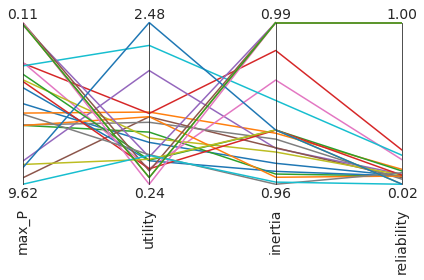

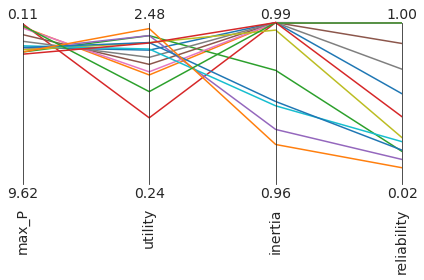

In [5]:

parallelPlot(lhcDfMin, 'LHC-Experiment_Policy0-nfe1000000', limits=limit)
parallelPlot(nsDf, 'NoveltySearch-Experiment_Policy0-nfe1000000', limits=limit)

## All feature scoring matrices

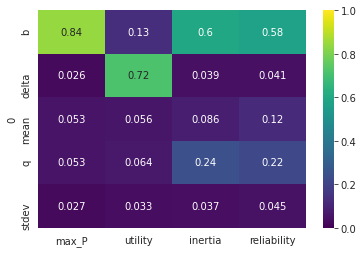

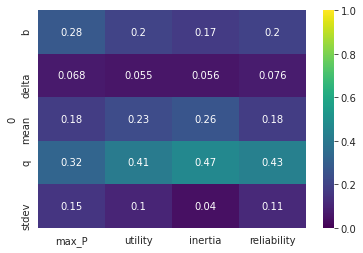

In [6]:
lhcDfMin = minimizeDF(lhcDf, 1000)
plotHeatmap(lhcDfMin, 'LHC-Experiment_Policy0-nfe1000000')
plotHeatmap(nsDf, 'NoveltySearch-Experiment_Policy0-nfe1000000')

## deprecated scatterplots

They have missing types, therefore they cannot be made. Did leave it in as it shows the possibility to generate and work with limits. but that is obsolete when working with multiple dataframes in a single plot.

In [7]:

lhcLim = pairsPlotEMA(lhcDfMin, 'LHC-Experiment_Policy0-nfe1000000-base')
nsLim = pairsPlotEMA(nsDf, 'NoveltySearch-Experiment_Policy0-nfe1000000-base')

KeyError: "['type'] not in index"

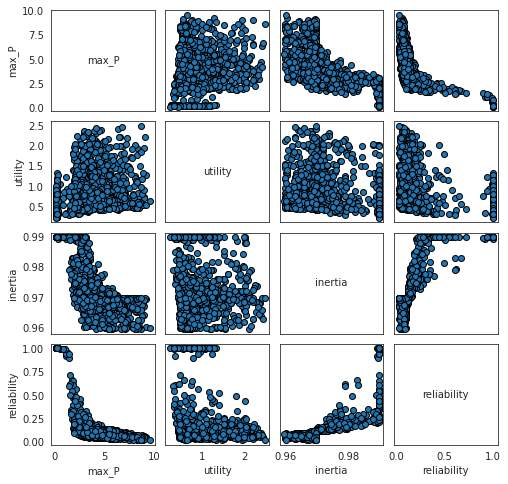

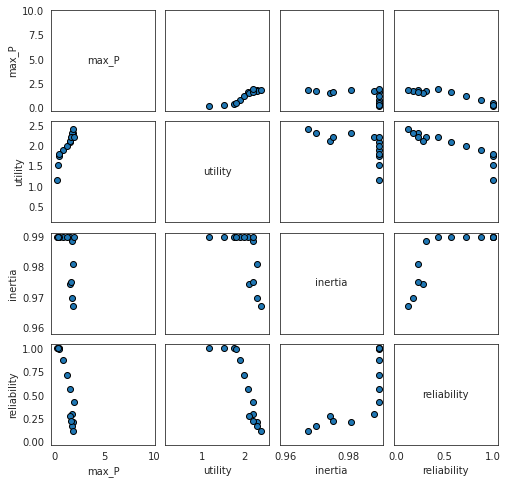

{('max_P', 'max_P'): <AxesSubplot:ylabel='max_P'>,
 ('max_P', 'utility'): <AxesSubplot:>,
 ('max_P', 'inertia'): <AxesSubplot:>,
 ('max_P', 'reliability'): <AxesSubplot:>,
 ('utility', 'max_P'): <AxesSubplot:ylabel='utility'>,
 ('utility', 'utility'): <AxesSubplot:>,
 ('utility', 'inertia'): <AxesSubplot:>,
 ('utility', 'reliability'): <AxesSubplot:>,
 ('inertia', 'max_P'): <AxesSubplot:ylabel='inertia'>,
 ('inertia', 'utility'): <AxesSubplot:>,
 ('inertia', 'inertia'): <AxesSubplot:>,
 ('inertia', 'reliability'): <AxesSubplot:>,
 ('reliability', 'max_P'): <AxesSubplot:xlabel='max_P', ylabel='reliability'>,
 ('reliability', 'utility'): <AxesSubplot:xlabel='utility'>,
 ('reliability', 'inertia'): <AxesSubplot:xlabel='inertia'>,
 ('reliability', 'reliability'): <AxesSubplot:xlabel='reliability'>}

In [8]:
pairsPlotEMA(lhcDfMin, 'LHC-Experiment_Policy0-nfe1000000-normalized', lhcLim)
pairsPlotEMA(nsDf, 'NoveltySearch-Experiment_Policy0-nfe1000000-normalized', lhcLim)

## Latest (current version) scatterplots with multiple dataframes in a scatterplot

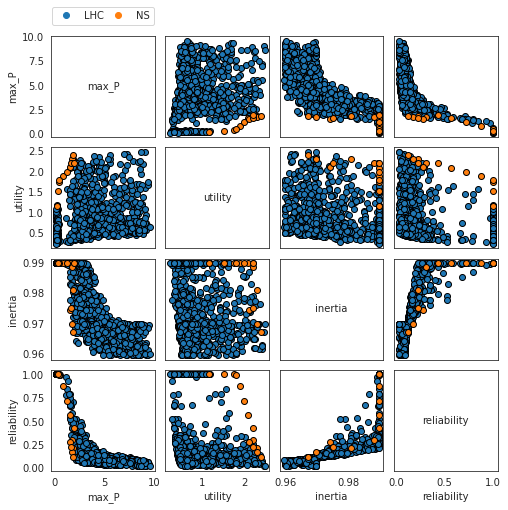

{('max_P', 'max_P'): <AxesSubplot:ylabel='max_P'>,
 ('max_P', 'utility'): <AxesSubplot:>,
 ('max_P', 'inertia'): <AxesSubplot:>,
 ('max_P', 'reliability'): <AxesSubplot:>,
 ('utility', 'max_P'): <AxesSubplot:ylabel='utility'>,
 ('utility', 'utility'): <AxesSubplot:>,
 ('utility', 'inertia'): <AxesSubplot:>,
 ('utility', 'reliability'): <AxesSubplot:>,
 ('inertia', 'max_P'): <AxesSubplot:ylabel='inertia'>,
 ('inertia', 'utility'): <AxesSubplot:>,
 ('inertia', 'inertia'): <AxesSubplot:>,
 ('inertia', 'reliability'): <AxesSubplot:>,
 ('reliability', 'max_P'): <AxesSubplot:xlabel='max_P', ylabel='reliability'>,
 ('reliability', 'utility'): <AxesSubplot:xlabel='utility'>,
 ('reliability', 'inertia'): <AxesSubplot:xlabel='inertia'>,
 ('reliability', 'reliability'): <AxesSubplot:xlabel='reliability'>}

In [8]:
nsDf['type'] = "NS"
lhcDfMin['type'] = "LHC"
conDf = pd.concat([nsDf, lhcDfMin])
# print(conDf)
pairsPlotEMA(conDf, 'Experiment_Policy0-nfe1000000-combined', groupby='type')

## Generate scenarios and copy paste into unexpectedTryTest.py to check if results are existing.

In [17]:
getScenarios(nsDf)

Scenario('scenarioReference0', b=0.3569907160294662, q=4.5, mean=0.05, stdev=0.0010509606239627, delta=0.9899999961789584),
Scenario('scenarioReference1', b=0.3634450631260745, q=4.499617441797741, mean=0.0498764237853059, stdev=0.0010682668803204, delta=0.9899999550991438),
Scenario('scenarioReference2', b=0.45, q=2.621292382762292, mean=0.049752473093891, stdev=0.001, delta=0.99),
Scenario('scenarioReference3', b=0.45, q=4.10885281027123, mean=0.0404130443409147, stdev=0.001, delta=0.9899999930165314),
Scenario('scenarioReference4', b=0.45, q=2.0, mean=0.0234851301665161, stdev=0.001, delta=0.99),
Scenario('scenarioReference5', b=0.362071679837997, q=4.49956653354773, mean=0.0499998359446319, stdev=0.0010055369580853, delta=0.9899911518172346),
Scenario('scenarioReference6', b=0.3633614847239376, q=4.4997365064078965, mean=0.0499999277431624, stdev=0.0010055369580853, delta=0.9899910115243484),
Scenario('scenarioReference7', b=0.3602477471962437, q=4.5, mean=0.05, stdev=0.00100020848